In [3]:
#Task1.1
import pandas as pd

# Load the dataset
df = pd.read_csv("Railway_info (1).csv")

# Display the first 10 rows
print("First 10 Rows:")
print(df.head(10))

# Get basic info about the dataset
print("\nDataset Info:")
df.info()

First 10 Rows:
   Train_No    Train_Name           Source_Station_Name  \
0       107  SWV-MAO-VLNK               SAWANTWADI ROAD   
1       108  VLNK-MAO-SWV                   MADGOAN JN.   
2       128  MAO-KOP SPEC                   MADGOAN JN.   
3       290  PALACE ON WH             DELHI-SAFDAR JANG   
4       401  BSB BHARATDA                    AURANGABAD   
5       421  LKO-SVDK FTR                   LUCKNOW JN.   
6       422  SVDK-LKO FTR  SHRI MATA VAISHNO DEVI KATRA   
7       477  FTR TRAIN NO                         SIRSA   
8       502  RJPB-UMB FTR        RAJENDRANAGAR TERMINAL   
9       504  PNBE-BTI FTR                     PATNA JN.   

             Destination_Station_Name       days  
0                         MADGOAN JN.   Saturday  
1                     SAWANTWADI ROAD     Friday  
2  CHHATRAPATI SHAHU MAHARAJ TERMINUS     Friday  
3                   DELHI-SAFDAR JANG  Wednesday  
4                        VARANASI JN.   Saturday  
5        SHRI MATA VAISHNO DE

In [4]:
#Task1.2
# Number of trains
num_trains = df['Train_No'].nunique()

# Number of unique source stations
unique_source_stations = df['Source_Station_Name'].nunique()

# Number of unique destination stations
unique_destination_stations = df['Destination_Station_Name'].nunique()

# Most common source station
most_common_source = df['Source_Station_Name'].value_counts().idxmax()
most_common_source_count = df['Source_Station_Name'].value_counts().max()

# Most common destination station
most_common_destination = df['Destination_Station_Name'].value_counts().idxmax()
most_common_destination_count = df['Destination_Station_Name'].value_counts().max()

print("Number of unique trains:", num_trains)
print("Unique source stations:", unique_source_stations)
print("Unique destination stations:", unique_destination_stations)
print("Most common source station:", most_common_source, "-", most_common_source_count, "trains")
print("Most common destination station:", most_common_destination, "-", most_common_destination_count, "trains")


Number of unique trains: 11113
Unique source stations: 921
Unique destination stations: 924
Most common source station: CST-MUMBAI - 513 trains
Most common destination station: CST-MUMBAI - 514 trains


In [5]:
#Task1.3
# Check for missing values
missing_values = df.isnull().sum()

# Standardize station names to uppercase
df['Source_Station_Name'] = df['Source_Station_Name'].str.upper()
df['Destination_Station_Name'] = df['Destination_Station_Name'].str.upper()

# Re-check missing values after cleaning
cleaned_missing_values = df.isnull().sum()

# Display a sample entry to confirm formatting
print("Missing values before cleaning:\n", missing_values)
print("\nMissing values after cleaning:\n", cleaned_missing_values)
print("\nSample Source Station Name:", df['Source_Station_Name'].iloc[0])
print("Sample Destination Station Name:", df['Destination_Station_Name'].iloc[0])


Missing values before cleaning:
 Train_No                    0
Train_Name                  0
Source_Station_Name         0
Destination_Station_Name    0
days                        0
dtype: int64

Missing values after cleaning:
 Train_No                    0
Train_Name                  0
Source_Station_Name         0
Destination_Station_Name    0
days                        0
dtype: int64

Sample Source Station Name: SAWANTWADI ROAD
Sample Destination Station Name: MADGOAN JN.


In [6]:
#Task2.1
# Filter trains that operate only on Saturdays
saturday_trains = df[df['days'].str.lower() == 'saturday']

# Extract trains that start from a specific station (example: "DELHI")
# Using 'contains' for partial match
delhi_start_trains = df[df['Source_Station_Name'].str.contains("DELHI", case=False)]

# Display counts and previews
print("Number of trains running on Saturday:", len(saturday_trains))
print("First few Saturday trains:")
print(saturday_trains.head())

print("\nNumber of trains starting from stations containing 'DELHI':", len(delhi_start_trains))
print("First few Delhi-origin trains:")
print(delhi_start_trains.head())


Number of trains running on Saturday: 1441
First few Saturday trains:
    Train_No    Train_Name Source_Station_Name Destination_Station_Name  \
0        107  SWV-MAO-VLNK     SAWANTWADI ROAD              MADGOAN JN.   
4        401  BSB BHARATDA          AURANGABAD             VARANASI JN.   
21      1196  NGP-KRMI SPL      NAGPUR JN.(CR)                  KARMALI   
28      1706   JBP-BDTS SF            JABALPUR          BANDRA TERMINUS   
45      2834  SRC-RJT SF A     SANTRAGACHI JN.                   RAJKOT   

        days  
0   Saturday  
4   Saturday  
21  Saturday  
28  Saturday  
45  Saturday  

Number of trains starting from stations containing 'DELHI': 222
First few Delhi-origin trains:
     Train_No        Train_Name Source_Station_Name  \
3         290      PALACE ON WH   DELHI-SAFDAR JANG   
12      22439  SVDK VANDEBHARAT           NEW DELHI   
24       1442      DSJ-KK MTY S   DELHI-SAFDAR JANG   
62       4409      DLI-SVDK SPL           DELHI JN.   
138      6412     

In [7]:
#Task2.2
# Group by Source Station and count trains
trains_per_source = df.groupby('Source_Station_Name')['Train_No'].count().sort_values(ascending=False)

# Display top 5 source stations by number of originating trains
print("Top 5 Source Stations by Number of Trains:")
print(trains_per_source.head())

# Calculate average number of trains per day from each source station
# First, count trains per source station per day
trains_per_day = df.groupby(['Source_Station_Name', 'days'])['Train_No'].count().reset_index()

# Then, calculate average trains per day for each source
average_trains_per_day = trains_per_day.groupby('Source_Station_Name')['Train_No'].mean().sort_values(ascending=False)

# Display top 5 stations with highest average trains per day
print("\nTop 5 Source Stations by Average Trains Per Day:")
print(average_trains_per_day.head())


Top 5 Source Stations by Number of Trains:
Source_Station_Name
CST-MUMBAI       513
SEALDAH          372
CHENNAI BEACH    339
HOWRAH JN.       338
KALYAN JN        285
Name: Train_No, dtype: int64

Top 5 Source Stations by Average Trains Per Day:
Source_Station_Name
CST-MUMBAI    51.300000
SEALDAH       41.333333
KALYAN JN     40.714286
HOWRAH JN.    30.727273
THANE         26.571429
Name: Train_No, dtype: float64


In [8]:
#task2.3
# Define function to classify the day
def categorize_day(day):
    day = day.lower()
    if day in ['saturday', 'sunday']:
        return 'Weekend'
    else:
        return 'Weekday'

# Apply the function to create a new column
df['Day_Type'] = df['days'].apply(categorize_day)

# Display a few rows to verify
print(df[['Train_Name', 'days', 'Day_Type']].head())


     Train_Name       days Day_Type
0  SWV-MAO-VLNK   Saturday  Weekend
1  VLNK-MAO-SWV     Friday  Weekday
2  MAO-KOP SPEC     Friday  Weekday
3  PALACE ON WH  Wednesday  Weekday
4  BSB BHARATDA   Saturday  Weekend


/tmp/ipython-input-9-1927519692.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_counts.index, y=day_counts.values, palette='viridis')


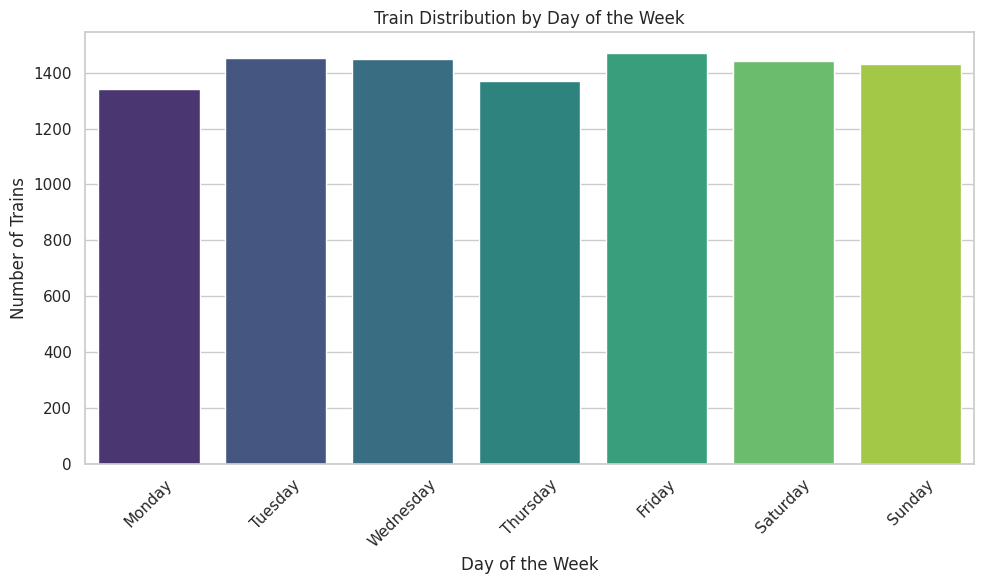

/tmp/ipython-input-9-1927519692.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_sources.index, x=top_sources.values, palette='magma')


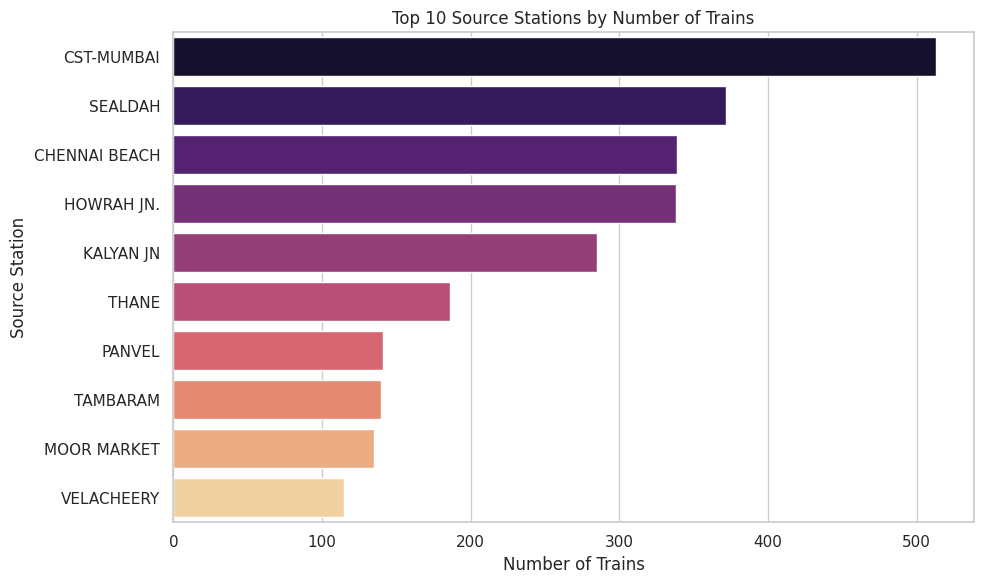

/tmp/ipython-input-9-1927519692.py:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_destinations.index, x=top_destinations.values, palette='cividis')


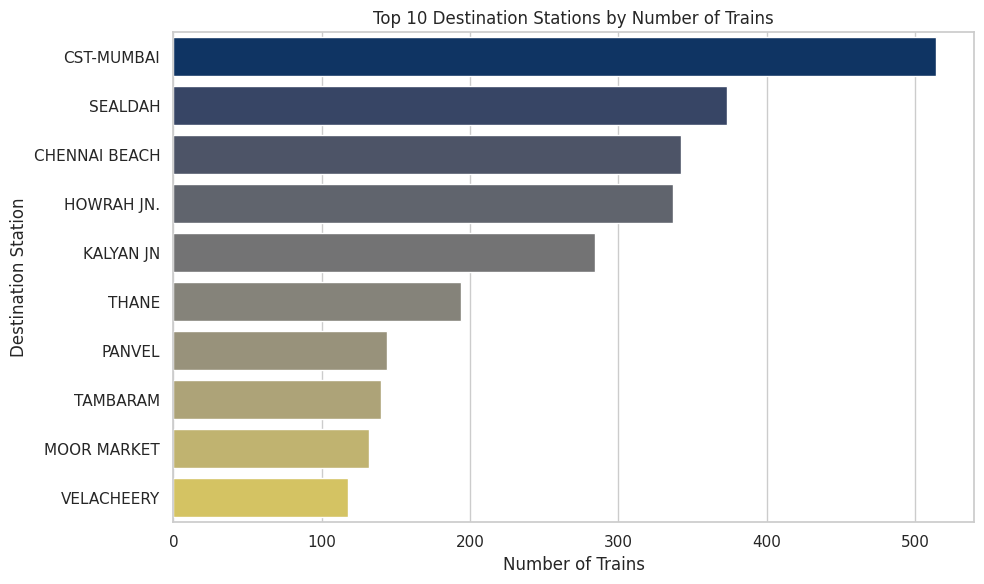

In [9]:
#task3.1
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot style
sns.set(style="whitegrid")

# Count of trains operating each day
day_counts = df['days'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x=day_counts.index, y=day_counts.values, palette='viridis')
plt.title("Train Distribution by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Trains")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Top 10 source stations by train count
top_sources = df['Source_Station_Name'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(y=top_sources.index, x=top_sources.values, palette='magma')
plt.title("Top 10 Source Stations by Number of Trains")
plt.xlabel("Number of Trains")
plt.ylabel("Source Station")
plt.tight_layout()
plt.show()

# Top 10 destination stations by train count
top_destinations = df['Destination_Station_Name'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(y=top_destinations.index, x=top_destinations.values, palette='cividis')
plt.title("Top 10 Destination Stations by Number of Trains")
plt.xlabel("Number of Trains")
plt.ylabel("Destination Station")
plt.tight_layout()
plt.show()


         Day  Train_Count
0     Monday         1342
1    Tuesday         1454
2  Wednesday         1448
3   Thursday         1372
4     Friday         1471
5   Saturday         1441
6     Sunday         1432


/tmp/ipython-input-10-65213951.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=day_df, x='Day', y='Train_Count', palette='crest')


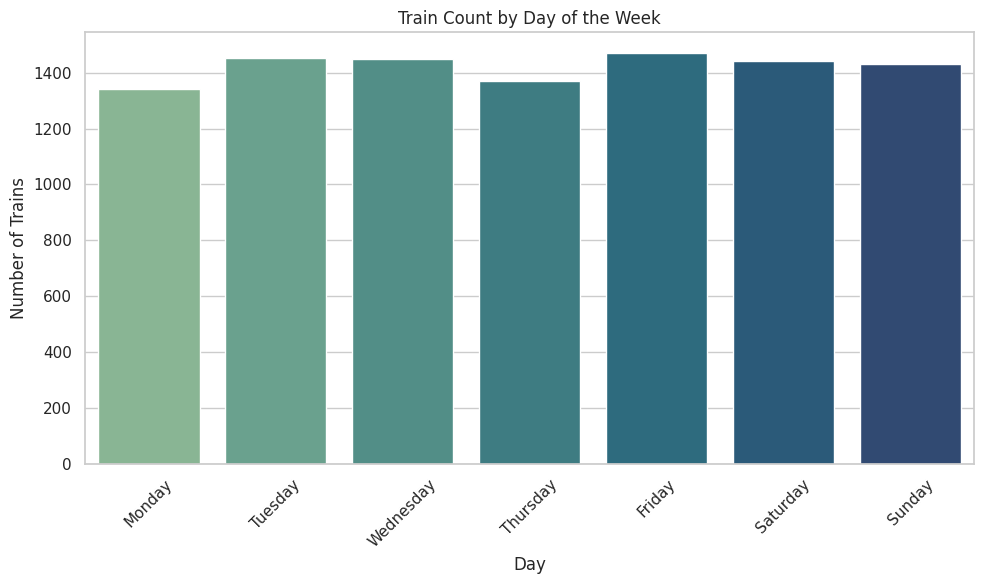

In [10]:
#Task3.2
# Count trains by day of the week
day_distribution = df['days'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Convert to a DataFrame for correlation-like structure
day_df = day_distribution.reset_index()
day_df.columns = ['Day', 'Train_Count']
print(day_df)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(data=day_df, x='Day', y='Train_Count', palette='crest')
plt.title("Train Count by Day of the Week")
plt.xlabel("Day")
plt.ylabel("Number of Trains")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


/tmp/ipython-input-11-4061413135.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=day_counts.index, y=day_counts.values, palette='viridis')


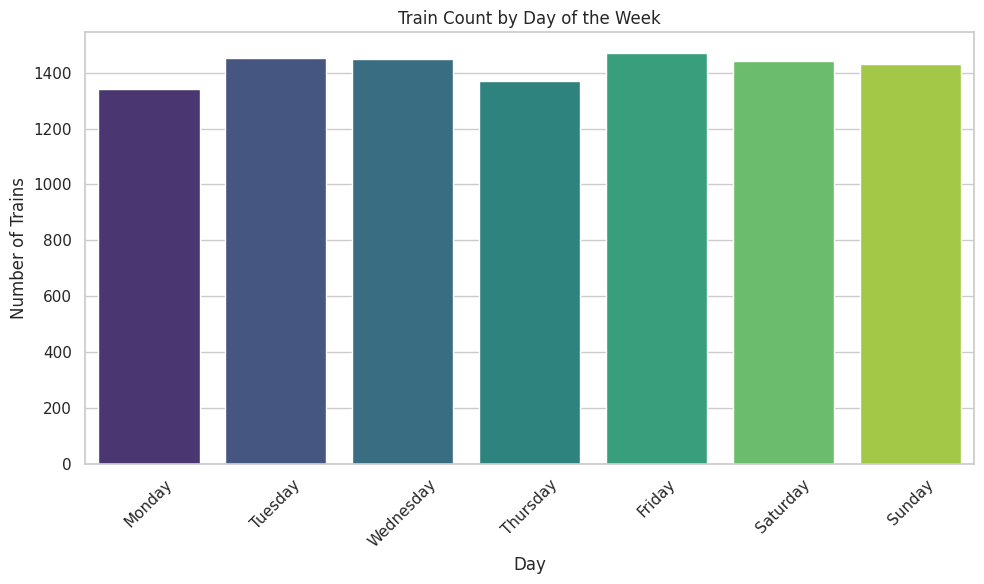

/tmp/ipython-input-11-4061413135.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_sources.index, x=top_sources.values, palette='magma')


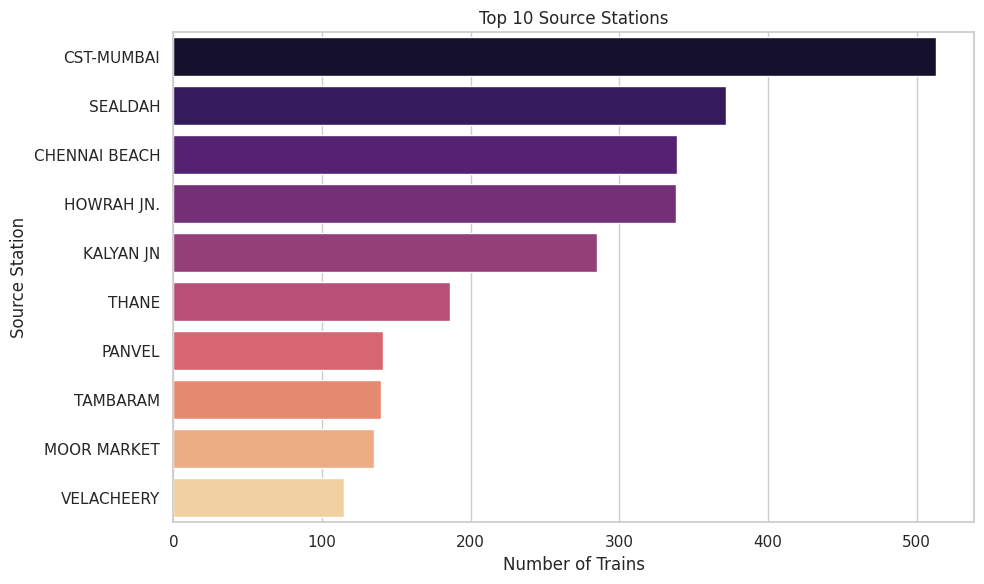

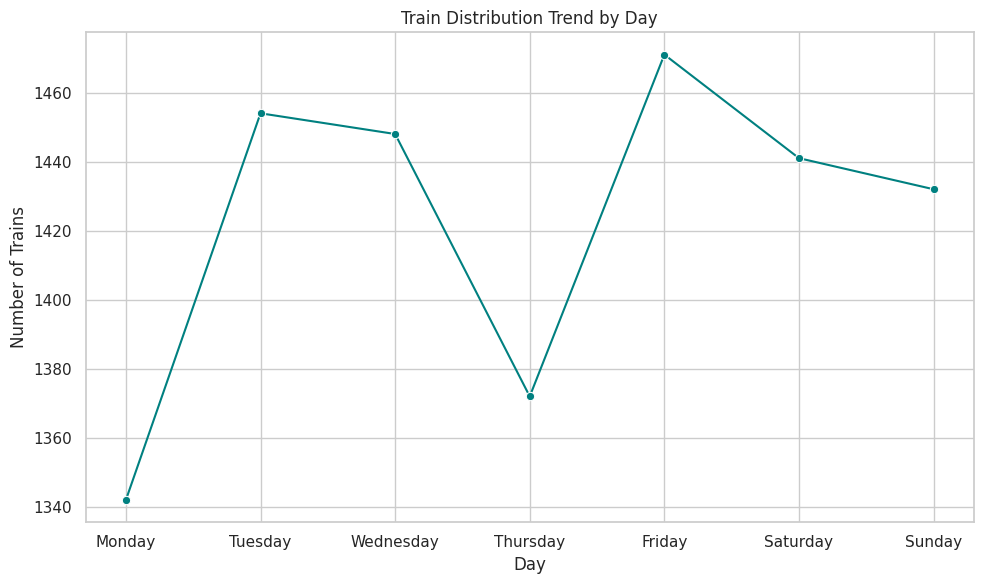

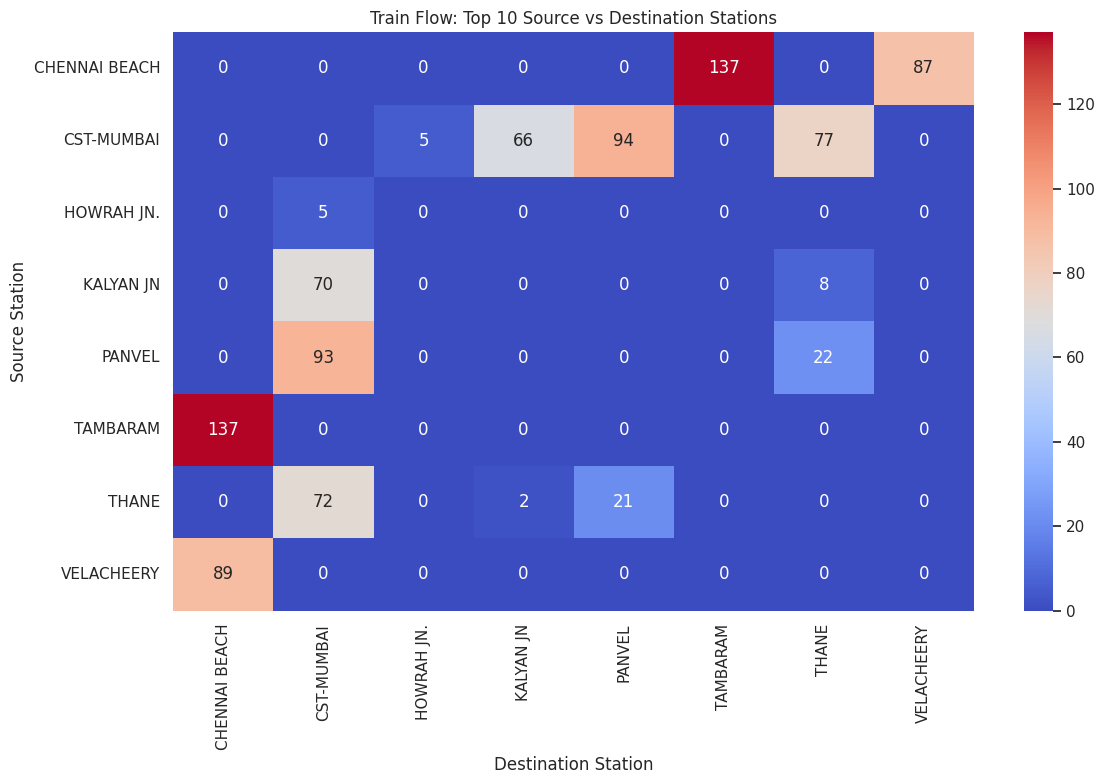

In [11]:
#Task4.1
import matplotlib.pyplot as plt
import seaborn as sns

# Prepare data
day_counts = df['days'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x=day_counts.index, y=day_counts.values, palette='viridis')
plt.title("Train Count by Day of the Week")
plt.xlabel("Day")
plt.ylabel("Number of Trains")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


top_sources = df['Source_Station_Name'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(y=top_sources.index, x=top_sources.values, palette='magma')
plt.title("Top 10 Source Stations")
plt.xlabel("Number of Trains")
plt.ylabel("Source Station")
plt.tight_layout()
plt.show()


plt.figure(figsize=(10, 6))
sns.lineplot(x=day_counts.index, y=day_counts.values, marker='o', color='teal')
plt.title("Train Distribution Trend by Day")
plt.xlabel("Day")
plt.ylabel("Number of Trains")
plt.grid(True)
plt.tight_layout()
plt.show()


# Filter top 10 source and destination stations
top_10_sources = df['Source_Station_Name'].value_counts().head(10).index
top_10_destinations = df['Destination_Station_Name'].value_counts().head(10).index

# Pivot table for heatmap
heatmap_data = df[df['Source_Station_Name'].isin(top_10_sources) &
                  df['Destination_Station_Name'].isin(top_10_destinations)]
heatmap_pivot = heatmap_data.pivot_table(index='Source_Station_Name',
                                         columns='Destination_Station_Name',
                                         values='Train_No',
                                         aggfunc='count',
                                         fill_value=0)

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_pivot, annot=True, fmt='d', cmap='coolwarm')
plt.title("Train Flow: Top 10 Source vs Destination Stations")
plt.xlabel("Destination Station")
plt.ylabel("Source Station")
plt.tight_layout()
plt.show()
